#**Predictive Maintenance**

Predictive maintenance using machine learning involves leveraging algorithms and historical data to predict when equipment or machinery is likely to fail so that maintenance can be performed proactively, reducing downtime and costs associated with unexpected breakdowns.

#Exploratory Data Analysis

**EDA on Error Datasets**

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('/content/PdM_errors.csv')
data1

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [3]:
data1.shape

(3919, 3)

In [4]:
data1.isnull().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [5]:
data1['errorID'].value_counts()

error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

In [6]:
data1['errorID'].describe()

count       3919
unique         5
top       error1
freq        1010
Name: errorID, dtype: object

In [7]:
data1['datetime'].describe()

count                    3919
unique                   2720
top       2015-12-08 06:00:00
freq                       12
Name: datetime, dtype: object

In [8]:
data1['machineID'].value_counts() #Counts of errors in each Machine ID

22    60
78    54
99    54
49    51
81    51
      ..
19    28
86    27
31    26
6     23
77    22
Name: machineID, Length: 100, dtype: int64

In [9]:
data1['datetime'] = pd.to_datetime(data1['datetime']) #converting date into datetime format to represent dates and time in standard manner

Error Distribution Visualization

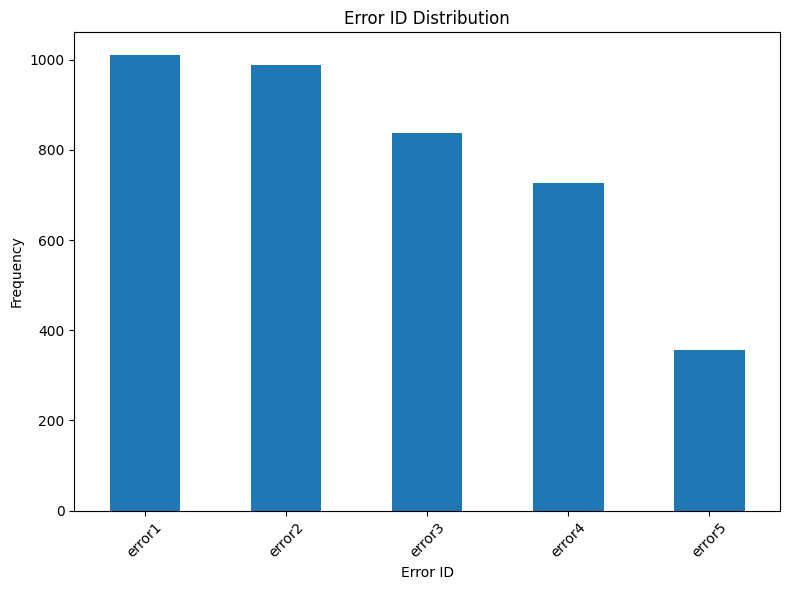

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
data1['errorID'].value_counts().plot(kind='bar')
plt.xlabel('Error ID')
plt.ylabel('Frequency')
plt.title('Error ID Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# SHowing how many times the particular error has occured.

Counting Errors per Machine (using barplot)

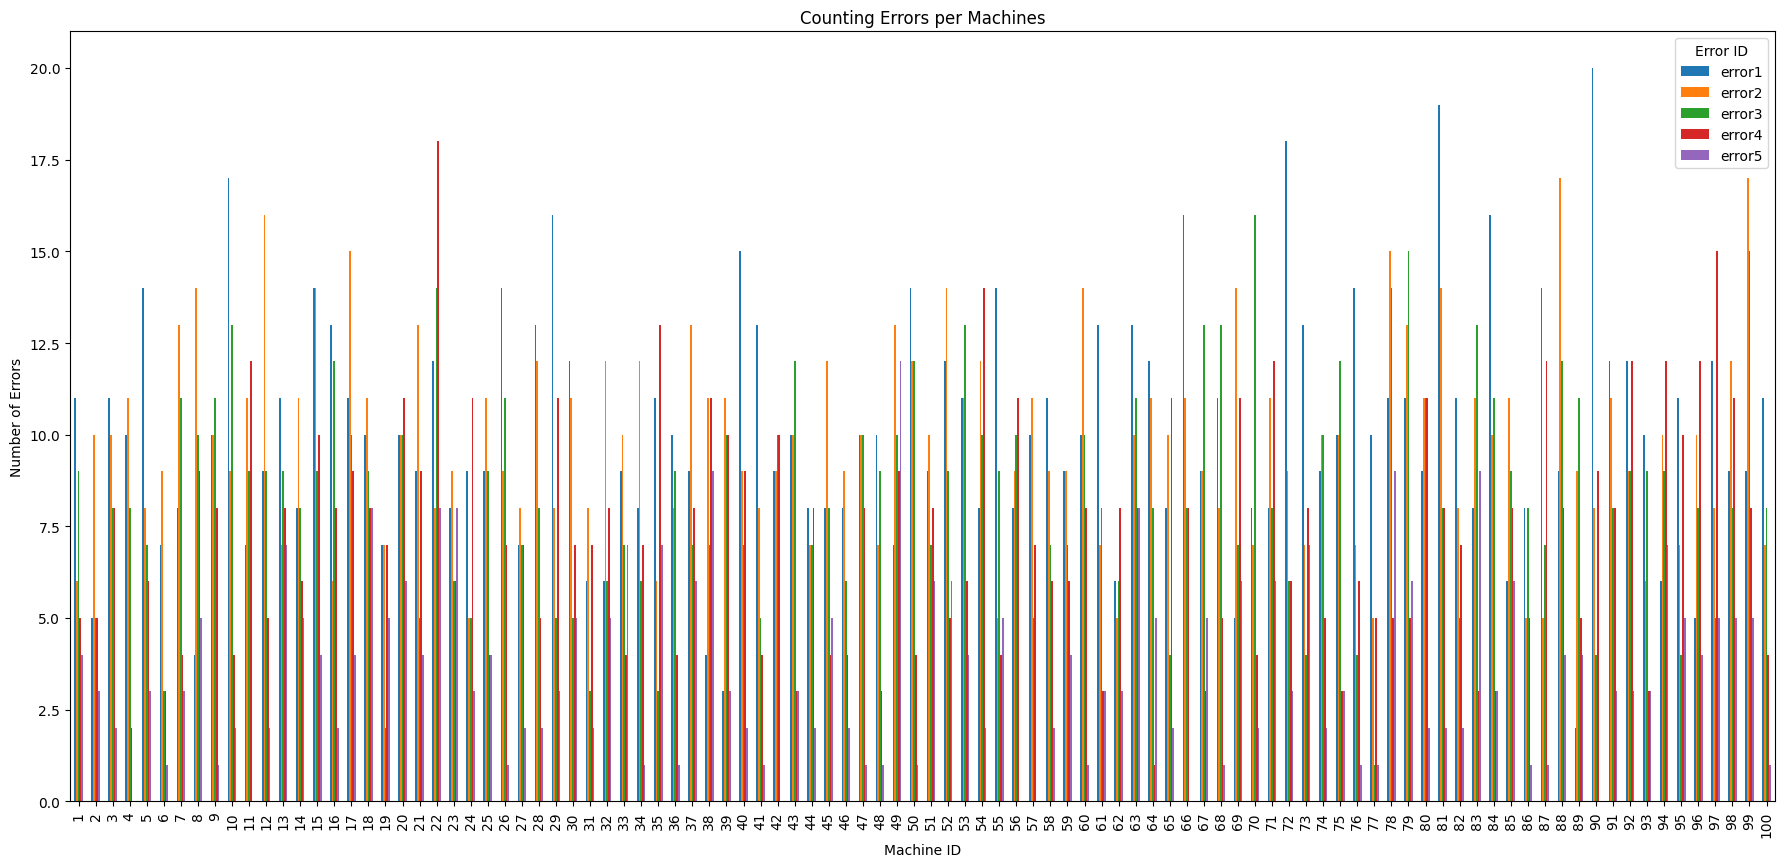

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

counted_error = data1.groupby(['machineID', 'errorID']).size().unstack(fill_value=0)
counted_error.plot(kind='bar', figsize=(22, 10))
plt.title('Counting Errors per Machines')
plt.xlabel('Machine ID')
plt.ylabel('Number of Errors')
plt.legend(title='Error ID')
plt.show()

Visualizing Errors per week (using line plot)

It represents the number of errors recorded in a particular week.

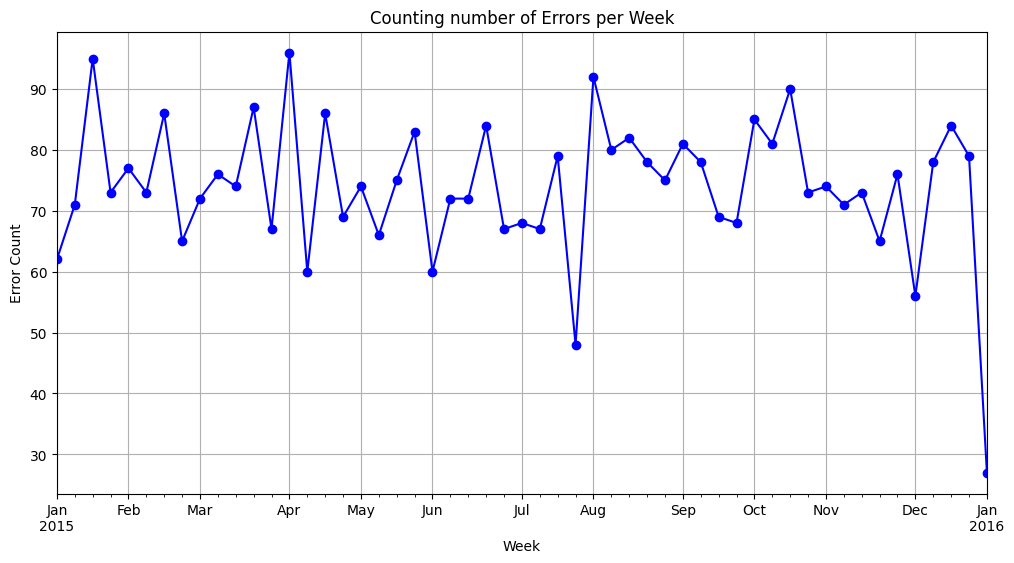

In [12]:
weekly_error= data1.resample('W-Mon', on='datetime').size()

plt.figure(figsize=(12, 6))
weekly_error.plot(marker='o', linestyle='-', color='blue')
plt.title('Counting number of Errors per Week')
plt.xlabel('Week')
plt.ylabel('Error Count')
plt.grid(True)
plt.show()

Finding out Numbers of Error in Machine 1 in a week

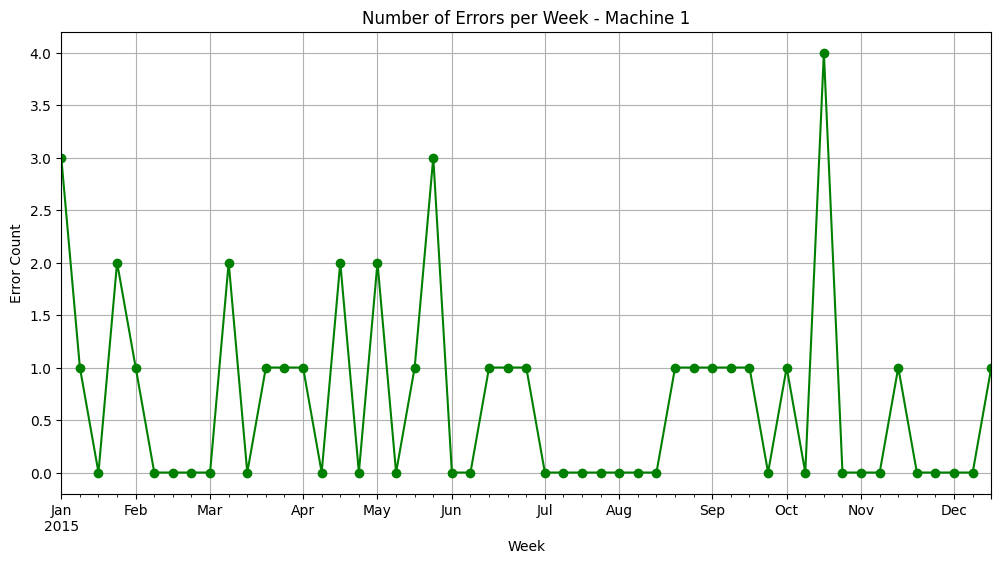

In [13]:
machine_1_data = data1[data1['machineID'] == 1]

errors_per_week_machine_1 = machine_1_data.resample('W-Mon', on='datetime').size()
plt.figure(figsize=(12, 6))
errors_per_week_machine_1.plot(marker='o', linestyle='-', color='green')
plt.title('Number of Errors per Week - Machine 1')
plt.xlabel('Week')
plt.ylabel('Error Count')
plt.grid(True)
plt.show()

Counting Errors in all machine from one specific day.

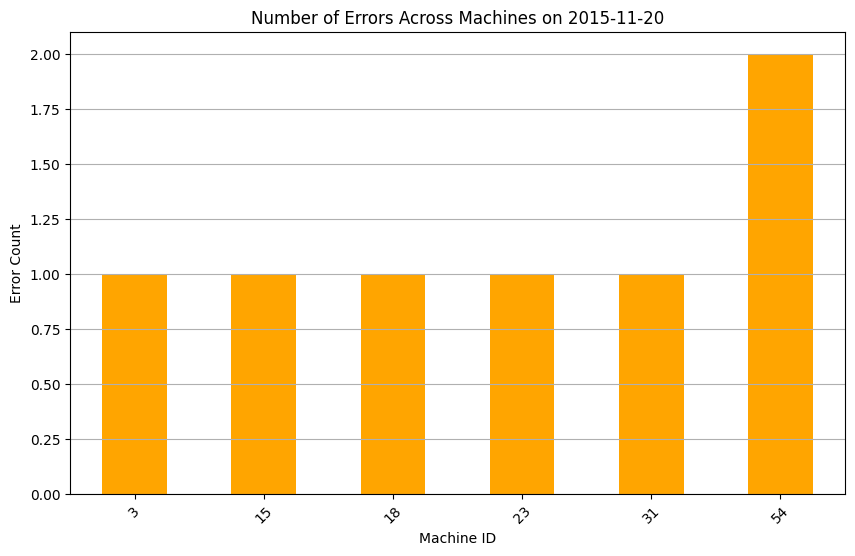

In [14]:
target_date = '2015-11-20'
data_for_day = data1[data1['datetime'].dt.date == pd.to_datetime(target_date).date()]

errors_per_machine = data_for_day.groupby('machineID').size()
plt.figure(figsize=(10, 6))
errors_per_machine.plot(kind='bar', color='orange')
plt.title(f'Number of Errors Across Machines on {target_date}')
plt.xlabel('Machine ID')
plt.ylabel('Error Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [15]:
# Perform one-hot encoding on ErrorID
error_data_encoded = pd.get_dummies(data1, columns=['errorID'])
print(error_data_encoded.head())

             datetime  machineID  errorID_error1  errorID_error2  \
0 2015-01-03 07:00:00          1               1               0   
1 2015-01-03 20:00:00          1               0               0   
2 2015-01-04 06:00:00          1               0               0   
3 2015-01-10 15:00:00          1               0               0   
4 2015-01-22 10:00:00          1               0               0   

   errorID_error3  errorID_error4  errorID_error5  
0               0               0               0  
1               1               0               0  
2               0               0               1  
3               0               1               0  
4               0               1               0  


**EDA on Failure Dataset**

In [16]:
data2 = pd.read_csv('/content/PdM_failures.csv')
data2

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1


In [17]:
data2['failure'].unique() #Components subject to failure

array(['comp4', 'comp1', 'comp2', 'comp3'], dtype=object)

In [18]:
data2.isnull().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [19]:
data2.shape

(761, 3)

In [20]:
data2.describe()

,machineID
count,761.000000
mean,51.911958
std,29.515542
min,1.000000
25%,24.000000
50%,51.000000
75%,79.000000
max,100.000000


In [21]:
data2['failure'].describe()

count       761
unique        4
top       comp2
freq        259
Name: failure, dtype: object

In [22]:
data2['failure'].value_counts() #Counts of failure in each component.

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

Failure Distribution

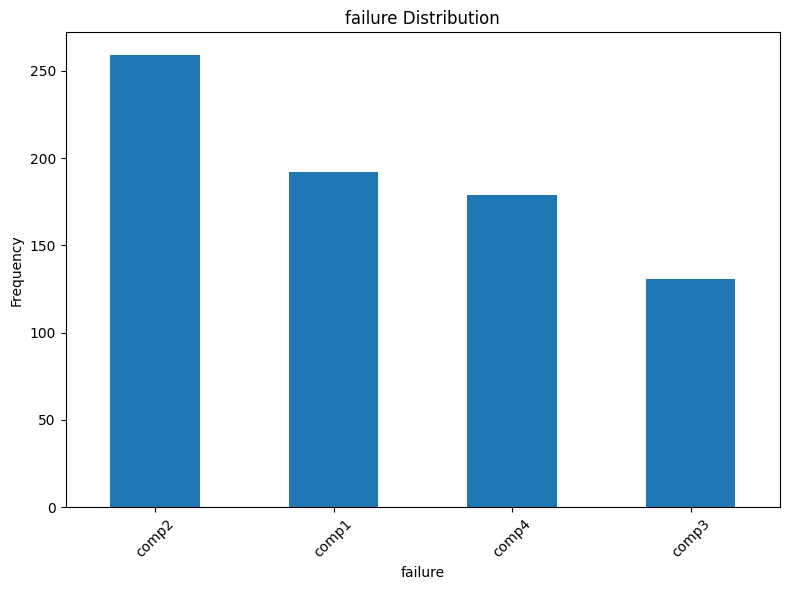

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
data2['failure'].value_counts().plot(kind='bar')
plt.xlabel('failure')
plt.ylabel('Frequency')
plt.title('failure Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Failure Trend over Time

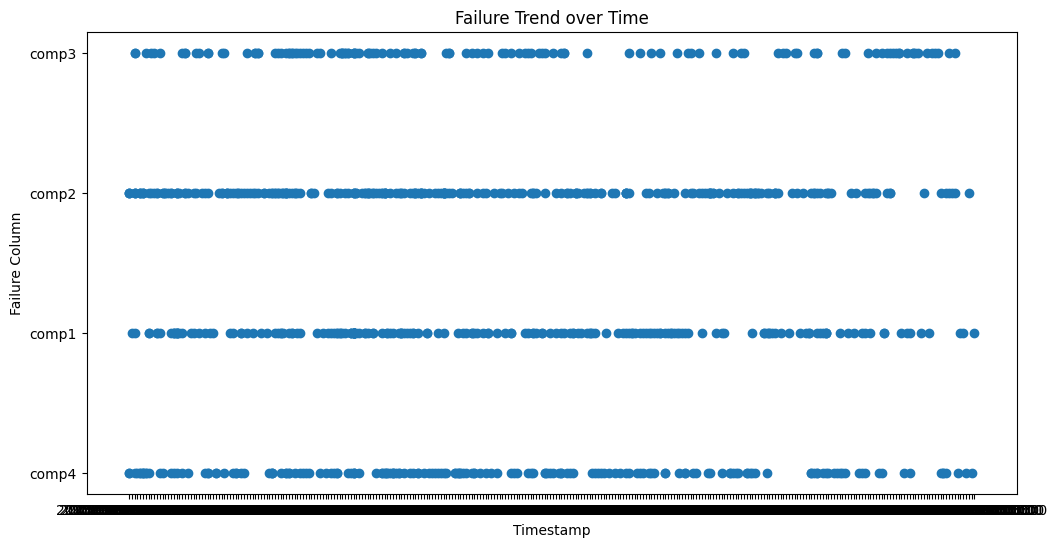

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(data2['datetime'], data2['failure'], marker='o')
plt.title('Failure Trend over Time')
plt.xlabel('Timestamp')
plt.ylabel('Failure Column')
plt.show()

# To visualize the trend of failures over time

Counts of Replaced Components

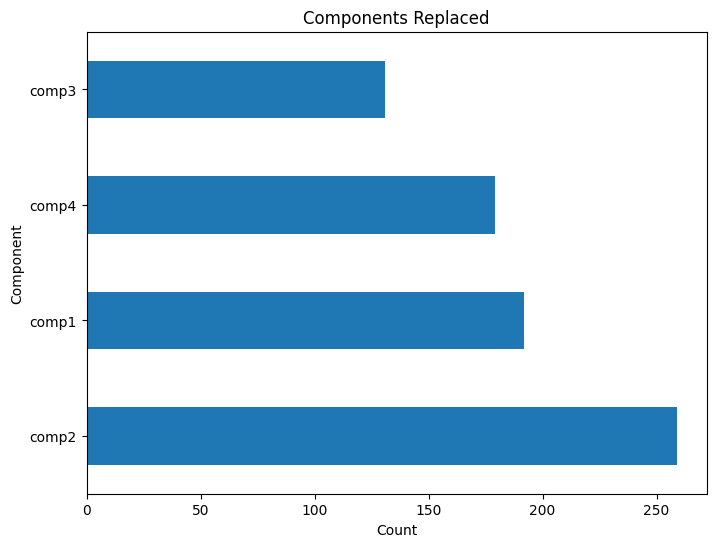

In [25]:
# Checking the number of components replaced
data2['failure'].value_counts(normalize=False).plot.barh(figsize=(8, 6))
plt.title("Components Replaced")
plt.xlabel("Count")
plt.ylabel("Component")
plt.show()

**Feature Engineering**

  For failure in each Component.

In [26]:
from sklearn.preprocessing import LabelEncoder

data2['FailureComp1'] = (data2['failure'] == 'comp1')
data2['FailureComp2'] = (data2['failure'] == 'comp2')
data2['FailureComp3'] = (data2['failure'] == 'comp3')
data2['FailureComp4'] = (data2['failure'] == 'comp4')
data2['NoFailure'] = (data2['failure'].isnull())

data2['datetime'] = pd.to_datetime(data2['datetime'])
# List of columns to encode
columns_to_encode = ['FailureComp1', 'FailureComp2', 'FailureComp3', 'FailureComp4', 'NoFailure']
label_encoder = LabelEncoder()

# Iterating through columns and apply label encoding
for column in columns_to_encode:
    data2[column] = label_encoder.fit_transform(data2[column])

print(data2[['datetime', 'NoFailure', 'FailureComp1', 'FailureComp2', 'FailureComp3', 'FailureComp4']])

               datetime  NoFailure  FailureComp1  FailureComp2  FailureComp3  \
0   2015-01-05 06:00:00          0             0             0             0   
1   2015-03-06 06:00:00          0             1             0             0   
2   2015-04-20 06:00:00          0             0             1             0   
3   2015-06-19 06:00:00          0             0             0             0   
4   2015-09-02 06:00:00          0             0             0             0   
..                  ...        ...           ...           ...           ...   
756 2015-11-29 06:00:00          0             0             0             1   
757 2015-12-14 06:00:00          0             0             0             0   
758 2015-02-12 06:00:00          0             1             0             0   
759 2015-09-10 06:00:00          0             1             0             0   
760 2015-12-09 06:00:00          0             0             1             0   

     FailureComp4  
0               1  

In [27]:
# Calculating the number of failures per machine
failures_per_machine = data2.groupby('machineID')['failure'].count().reset_index()

In [28]:
failures_per_machine

,machineID,failure
0,1,7
1,2,4
2,3,5
3,4,6
4,5,7
...,...,...
93,96,5
94,97,8
95,98,16
96,99,19


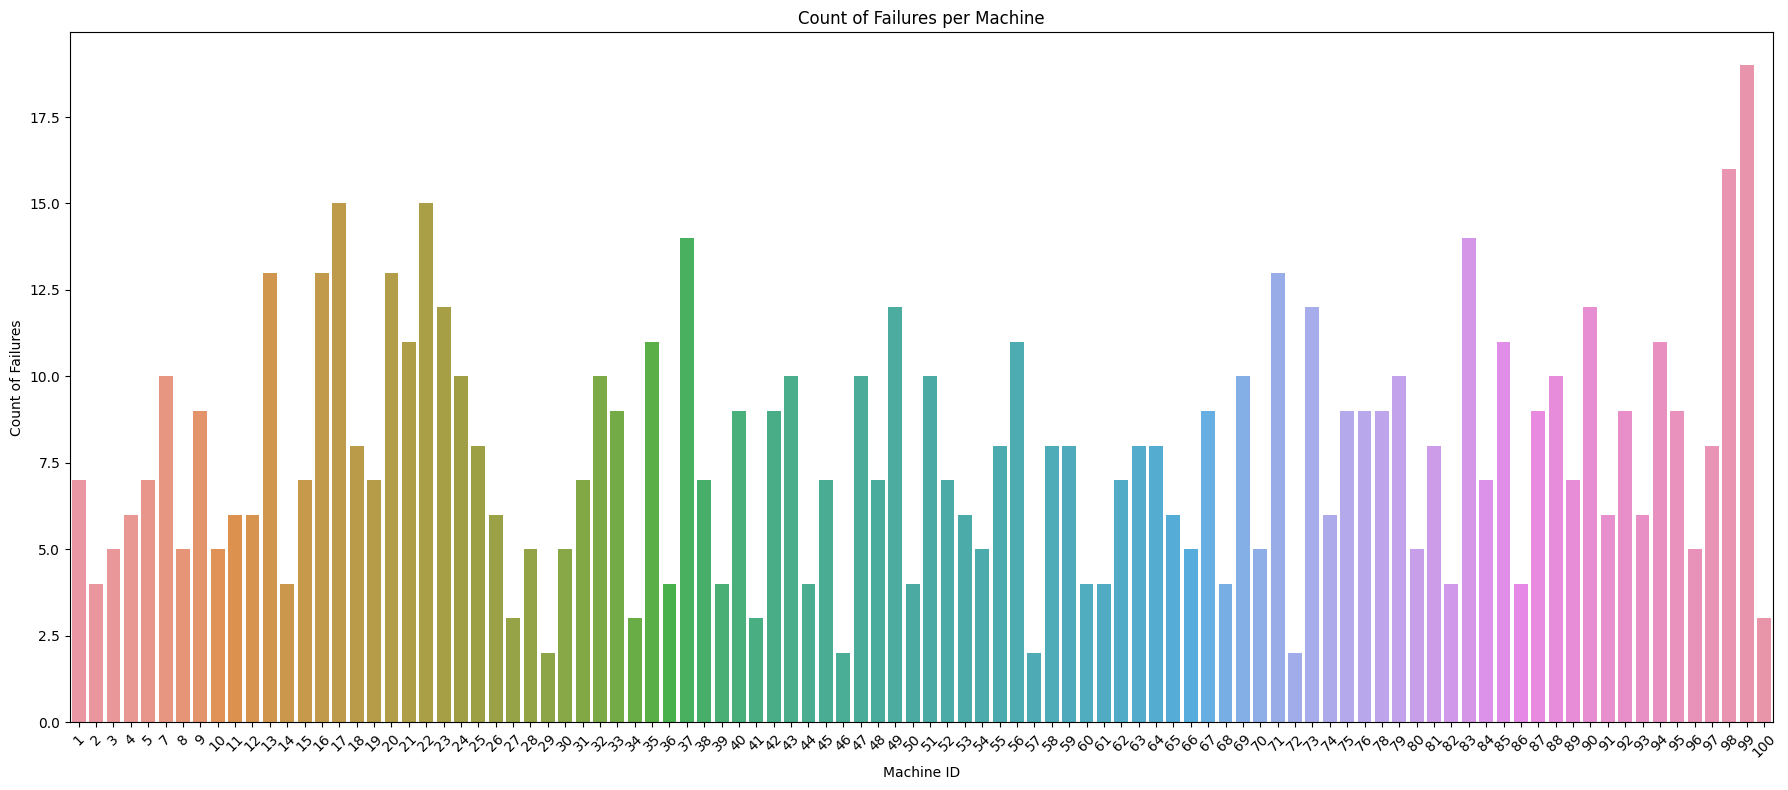

In [29]:
# Visualizing the count of failure per machine.
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.barplot(x='machineID', y='failure', data=failures_per_machine)
plt.xlabel('Machine ID')
plt.ylabel('Count of Failures')
plt.title('Count of Failures per Machine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**EDA on Machines Datasets**

In [30]:
data3 = pd.read_csv('/content/PdM_machines.csv')
data3

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


In [31]:
data3.isnull().sum()

machineID    0
model        0
age          0
dtype: int64

In [32]:
data3['model'].value_counts()

model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64

In [33]:
data3['age'].max()

20

In [34]:
data3['age'].min()

0

In [35]:
data3['age'].value_counts()

14    14
10    10
20     7
17     7
18     6
2      6
15     6
7      6
16     5
9      5
5      4
19     4
6      4
3      4
4      3
1      3
11     2
12     2
0      1
8      1
Name: age, dtype: int64

Age Distribution Across Machine Models

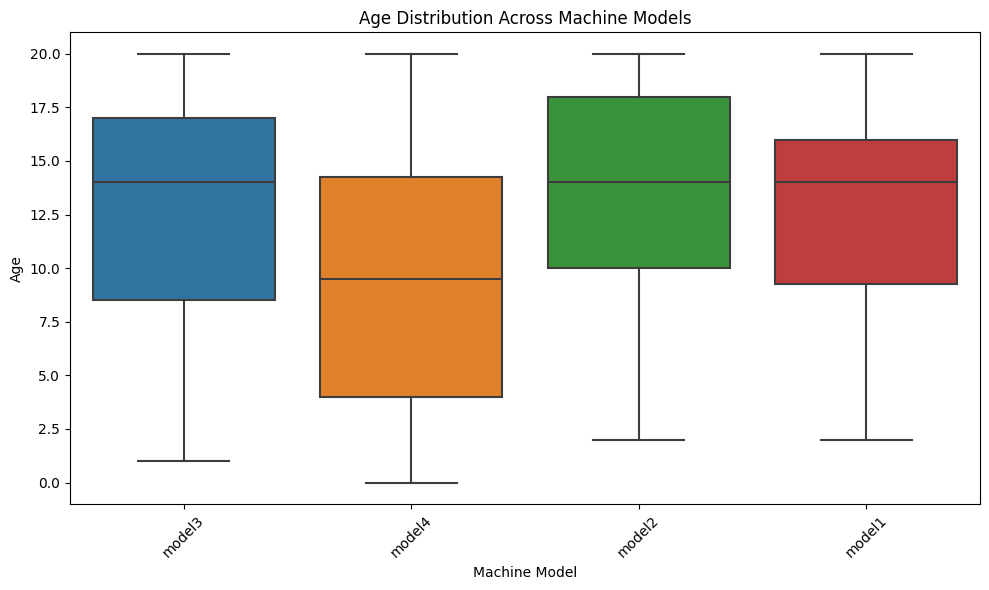

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='age', data=data3)
plt.title('Age Distribution Across Machine Models')
plt.xlabel('Machine Model')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Age per machine

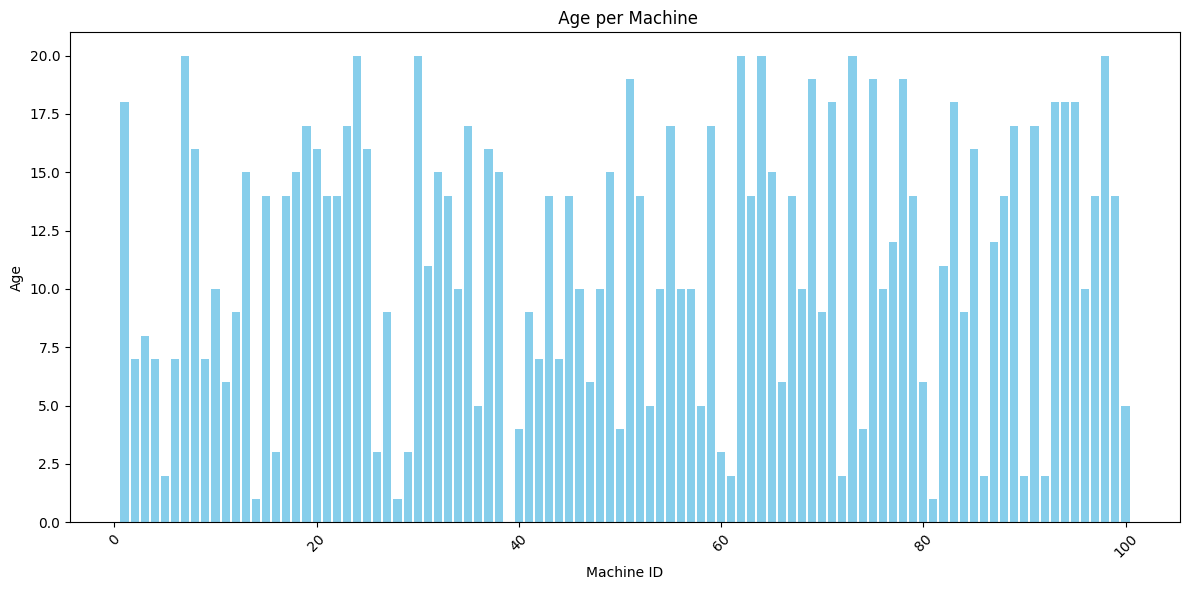

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(data3['machineID'], data3['age'], color='skyblue')
plt.title(' Age per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**EDA on Maintenance Datasets**

In [38]:
data4 = pd.read_csv('/content/PdM_maint.csv')
data4

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
...,...,...,...
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2


In [39]:
data4.shape

(3286, 3)

In [40]:
data4.isnull().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [41]:
data4['datetime'] = pd.to_datetime(data4['datetime'])

**Feature Engineering**

From Maintenance Dataset

In [42]:
#Calculating time difference in hours since the previous maintenance for each component
for comp in ['comp1', 'comp2', 'comp3', 'comp4']:
    data4[f'hours_since_last_maintenance_{comp}'] = data4.groupby(['machineID', 'comp'])['datetime'].diff().dt.total_seconds() / 3600

for comp in ['comp1', 'comp2', 'comp3', 'comp4']:
    mask = data4['comp'] == comp
    data4[f'hours_since_last_maintenance_{comp}'] = data4[mask].groupby('machineID')['datetime'].diff().dt.total_seconds() / 3600
    data4[f'hours_since_last_maintenance_{comp}'] = data4[f'hours_since_last_maintenance_{comp}'].fillna(method='ffill')
    data4[f'hours_since_last_maintenance_{comp}'].fillna(9999, inplace=True)

data4

#Here, we are using forward fill so we can get the time difference from last maintenance until the next one.

,datetime,machineID,comp,hours_since_last_maintenance_comp1,hours_since_last_maintenance_comp2,hours_since_last_maintenance_comp3,hours_since_last_maintenance_comp4
0,2014-06-01 06:00:00,1,comp2,9999.0,9999.0,9999.0,9999.0
1,2014-07-16 06:00:00,1,comp4,9999.0,9999.0,9999.0,9999.0
2,2014-07-31 06:00:00,1,comp3,9999.0,9999.0,9999.0,9999.0
3,2014-12-13 06:00:00,1,comp1,9999.0,9999.0,9999.0,9999.0
4,2015-01-05 06:00:00,1,comp4,9999.0,9999.0,9999.0,4152.0
...,...,...,...,...,...,...,...
3281,2015-10-10 06:00:00,100,comp3,360.0,5424.0,1440.0,2160.0
3282,2015-10-25 06:00:00,100,comp4,360.0,5424.0,1440.0,1440.0
3283,2015-11-09 06:00:00,100,comp4,360.0,5424.0,1440.0,360.0
3284,2015-12-09 06:00:00,100,comp2,360.0,3240.0,1440.0,360.0


In [43]:
data4.describe()

,machineID,hours_since_last_maintenance_comp1,hours_since_last_maintenance_comp2,hours_since_last_maintenance_comp3,hours_since_last_maintenance_comp4
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000
mean,50.284236,1465.724589,1381.305539,1463.852100,1500.054778
std,28.914478,1468.512291,1474.747703,1439.474895,1459.321729
min,1.000000,264.000000,120.000000,360.000000,360.000000
25%,25.250000,360.000000,360.000000,360.000000,360.000000
50%,50.000000,1080.000000,720.000000,1080.000000,1080.000000
75%,75.000000,1800.000000,1800.000000,1800.000000,1800.000000
max,100.000000,11808.000000,9999.000000,9999.000000,9999.000000


Maintenance issues per day

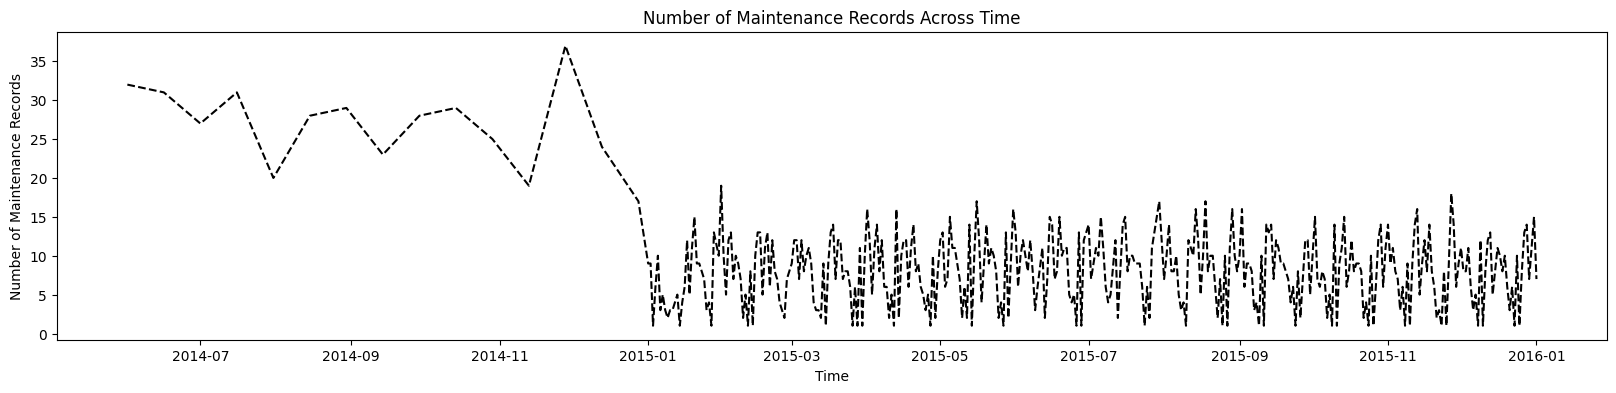

In [44]:
# Number of Maintenance Issues raised per day
data4.datetime.dt.date.value_counts().plot(
    style="k--",
    figsize=(20, 4),
    title="Number of Maintenance Records Across Time")
plt.ylabel("Number of Maintenance Records")
plt.xlabel("Time")
plt.show()

In [45]:
data4.isnull().sum()

datetime                              0
machineID                             0
comp                                  0
hours_since_last_maintenance_comp1    0
hours_since_last_maintenance_comp2    0
hours_since_last_maintenance_comp3    0
hours_since_last_maintenance_comp4    0
dtype: int64

In [46]:
data4['datetime'].min(), data4['datetime'].max()

(Timestamp('2014-06-01 06:00:00'), Timestamp('2016-01-01 06:00:00'))

Maintenance Counts on the basis of machine ID

In [47]:
import pandas as pd
maintenance = data4.sort_values(by=['machineID', 'datetime'])

# Calculating time since the last maintenance
maintenance['time_since_last_maintenance'] = data4.groupby('machineID')['datetime'].diff().dt.total_seconds() / 3600

# Calculating the number of maintenance events per machine
maintenance_counts = data4.groupby('machineID').size().reset_index(name='maintenance_count')

# Calculating the average time between maintenance events for each machine
maintenance_avg_time_between = maintenance.groupby('machineID')['time_since_last_maintenance'].mean().reset_index(name='avg_time_between_maintenance')

# Merge the calculated features back into the main dataset
integrated_data = data4.merge(maintenance_avg_time_between, on='machineID', how='left')

In [48]:
maintenance_counts

,machineID,maintenance_count
0,1,37
1,2,32
2,3,37
3,4,33
4,5,35
...,...,...
95,96,33
96,97,34
97,98,37
98,99,34


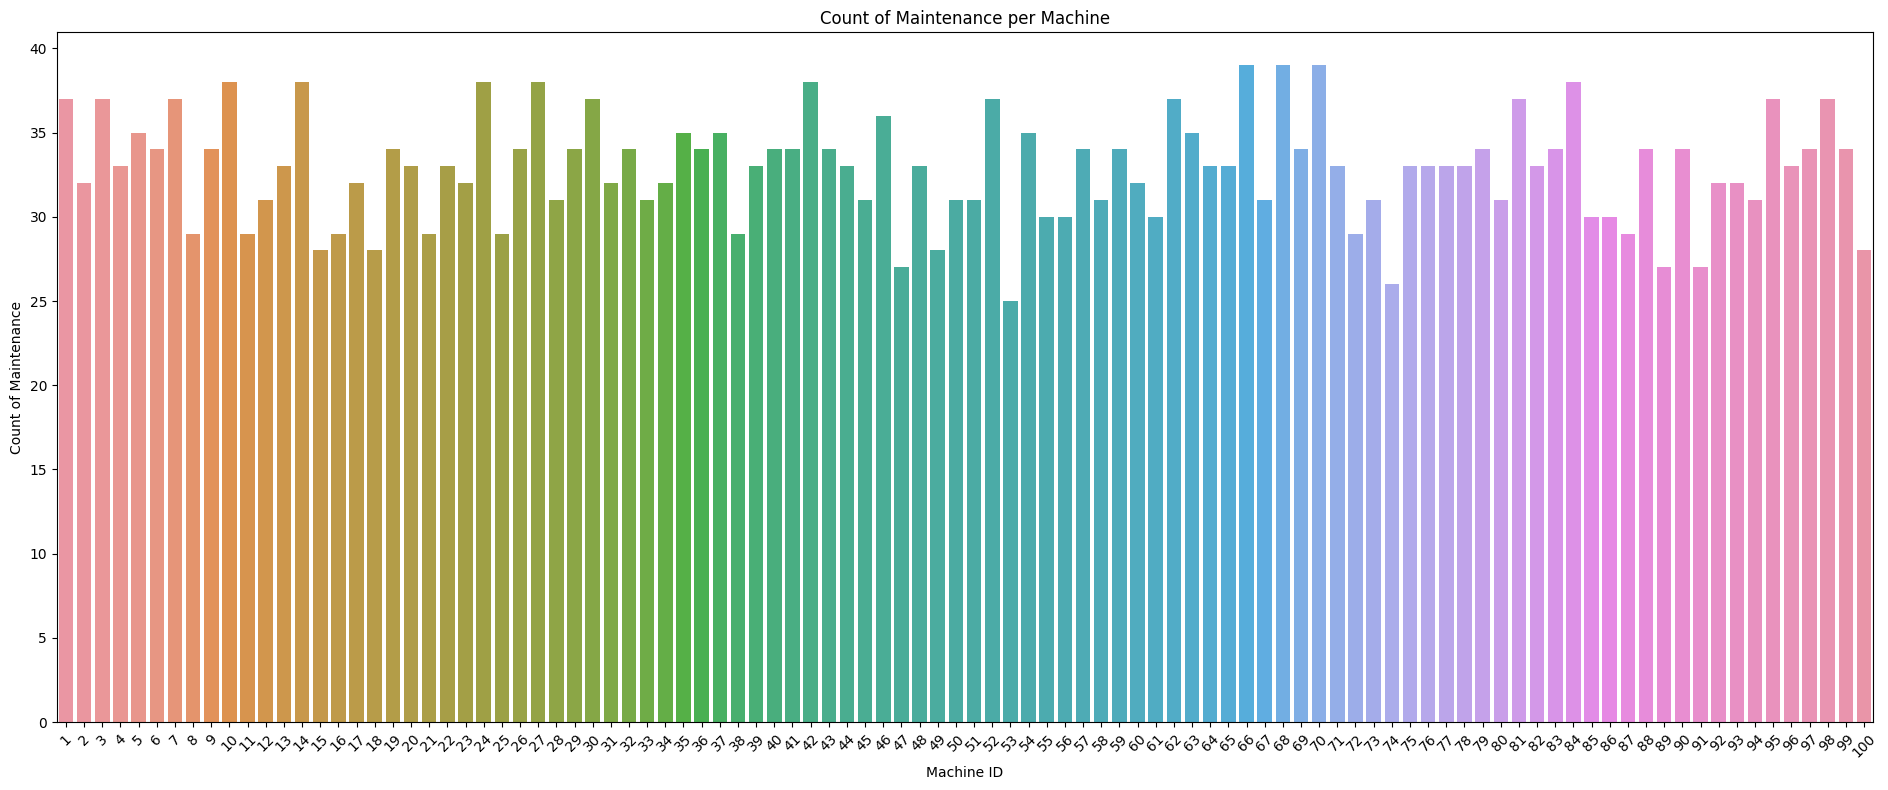

In [49]:
# Visualizing the count of Maintenancen per machine.
plt.figure(figsize=(19, 8))
sns.barplot(x='machineID', y='maintenance_count', data=maintenance_counts)
plt.xlabel('Machine ID')
plt.ylabel('Count of Maintenance')
plt.title('Count of Maintenance per Machine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**EDA on Telemetry Datasets**

In [50]:
data5 = pd.read_csv('/content/PdM_telemetry.csv')
data5

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1.0,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1.0,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1.0,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1.0,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1.0,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
470420,2015-09-11 21:00:00,54.0,181.848553,508.216712,106.000679,41.662566
470421,2015-09-11 22:00:00,54.0,163.102852,417.885173,104.131614,38.259921
470422,2015-09-11 23:00:00,54.0,174.708375,496.659488,109.352459,36.987631
470423,2015-09-12 00:00:00,54.0,193.633206,396.747466,98.565678,43.845999


In [51]:
data5.isnull().sum()

datetime     0
machineID    1
volt         1
rotate       1
pressure     1
vibration    1
dtype: int64

In [52]:
data5.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')

In [53]:
data5.shape

(470425, 6)

In [55]:
data5['datetime'] = pd.to_datetime(data5['datetime'])

ParserError: ignored

In [ ]:
from scipy import stats

z_scores = stats.zscore(data5['volt'])
threshold = 5
anomalies = data5['volt'][abs(z_scores) > threshold]

# Plotting anomalies
plt.figure(figsize=(10, 6))
plt.plot(data5['datetime'], data5['volt'], marker='o', linestyle='-', label='Normal')
plt.scatter(data5.loc[anomalies.index]['datetime'], anomalies, color='red', label='Anomalies')
plt.xlabel('Datetime')
plt.ylabel('Voltage')
plt.title('Voltage with Anomalies')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Pattern of Voltage overtime

for understanding voltage behaviour

In [ ]:
import plotly.express as px

plot_df = data5.query('machineID == 1 and "2015-03-22" < datetime < "2015-09-18"')[['datetime', 'volt']]

fig = px.line(plot_df, x='datetime', y='volt', title='Voltage over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Voltage')
fig.show()

Pattern of Pressure overtime

In [ ]:
import plotly.express as px

plot_df = data5.query('machineID == 4 and "2015-04-15" < datetime < "2015-10-23"')[['datetime', 'pressure']]

fig = px.line(plot_df, x='datetime', y='pressure', title='Pressure over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Pressure')
fig.show()

Pattern of Vibration overtime

In [ ]:
import plotly.express as px

plot_df = data5.query('machineID == 2 and "2015-09-16" < datetime < "2015-10-23"')[['datetime', 'vibration']]

fig = px.line(plot_df, x='datetime', y='vibration', title='Vibration over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Vibration')
fig.show()

Pattern of Rotate overtime

In [ ]:
import plotly.express as px

plot_df = data5.query('machineID == 3 and "2015-04-15" < datetime < "2015-05-12"')[['datetime', 'rotate']]

fig = px.line(plot_df, x='datetime', y='rotate', title='Rotate over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Rotate')
fig.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
import pickle


data1 = pd.read_csv('/content/PdM_errors.csv')
data1
data1['datetime'] = pd.to_datetime(data1['datetime'])
label_encoder = LabelEncoder()
data1['machineID'] = label_encoder.fit_transform(data1['machineID'])



data2 = pd.read_csv('/content/PdM_failures.csv')
data2
data2['FailureComp1'] = (data2['failure'] == 'comp1')
data2['FailureComp2'] = (data2['failure'] == 'comp2')
data2['FailureComp3'] = (data2['failure'] == 'comp3')
data2['FailureComp4'] = (data2['failure'] == 'comp4')
data2['NoFailure'] = (data2['failure'].isnull())
data2['datetime'] = pd.to_datetime(data2['datetime'])
print(data2[['datetime', 'failure', 'FailureComp1', 'FailureComp2', 'FailureComp3', 'FailureComp4']])
data2['datetime'] = pd.to_datetime(data2['datetime'])



data3 = pd.read_csv('/content/PdM_machines.csv')
label_encoder = LabelEncoder()
data3['machineID'] = label_encoder.fit_transform(data3['machineID'])



data4 = pd.read_csv('/content/PdM_maint.csv')
data4['datetime'] = pd.to_datetime(data4['datetime'])
# Calculating time difference in hours since the previous maintenance for each component
for comp in ['comp1', 'comp2', 'comp3', 'comp4']:
    data4[f'hours_since_last_maintenance_{comp}'] = data4.groupby(['machineID', 'comp'])['datetime'].diff().dt.total_seconds() / 3600

# Fill NaN values with a large number (assuming that NaN means it's the first maintenance event for that component)
for comp in ['comp1', 'comp2', 'comp3', 'comp4']:
    data4[f'hours_since_last_maintenance_{comp}'].fillna(9999, inplace=True)
label_encoder = LabelEncoder()
data4['machineID'] = label_encoder.fit_transform(data4['machineID'])



data5 = pd.read_csv('/content/PdM_telemetry.csv')
data5['datetime'] = pd.to_datetime(data5['datetime'])
label_encoder = LabelEncoder()
data5['machineID'] = label_encoder.fit_transform(data5['machineID'])




main_data = data5.merge(data3, on='machineID', how='left')
main_data = main_data.merge(data1.groupby(['machineID', 'datetime']).count().reset_index(), on=['machineID', 'datetime'], how='left')
main_data = main_data.merge(data2.groupby(['machineID', 'datetime']).count().reset_index(), on=['machineID', 'datetime'], how='left')
main_data = main_data.merge(data4.groupby(['machineID', 'datetime']).count().reset_index(), on=['machineID', 'datetime'], how='left', suffixes=('_main', '_data4'))

main_data['errorID'].fillna(main_data['errorID'].median(), inplace=True)
main_data['failure'].fillna(main_data['failure'].median(), inplace=True)
main_data['datetime'] = pd.to_datetime(main_data['datetime'])
main_data.set_index(['machineID', 'datetime'], inplace=True)

# rolling window size

main_data['datetime'] = pd.to_datetime(main_data['datetime'])
main_data.set_index(['machineID', 'datetime'], inplace=True)

# rolling window size
rolling_window_size = 3

# Rolling mean for 3 hours
main_data['Volt_RollingMean3'] = main_data['volt'].groupby('machineID').rolling(window=rolling_window_size).mean().reset_index(level=0, drop=True)
main_data['Rotate_RollingMean3'] = main_data['rotate'].groupby('machineID').rolling(window=rolling_window_size).mean().reset_index(level=0, drop=True)
main_data['Pressure_RollingMean3'] = main_data['pressure'].groupby('machineID').rolling(window=rolling_window_size).mean().reset_index(level=0, drop=True)
main_data['Vibration_RollingMean3'] = main_data['vibration'].groupby('machineID').rolling(window=rolling_window_size).mean().reset_index(level=0, drop=True)

#Rolling Min
main_data['Volt_RollingMin3'] = main_data['volt'].groupby('machineID').rolling(window=rolling_window_size).min().reset_index(level=0, drop=True)
main_data['Rotate_RollingMin3'] = main_data['rotate'].groupby('machineID').rolling(window=rolling_window_size).min().reset_index(level=0, drop=True)
main_data['Pressure_RollingMin3'] = main_data['pressure'].groupby('machineID').rolling(window=rolling_window_size).min().reset_index(level=0, drop=True)
main_data['Vibration_RollingMin3'] = main_data['vibration'].groupby('machineID').rolling(window=rolling_window_size).min().reset_index(level=0, drop=True)

#Rolling Max
main_data['Volt_RollingMax3'] = main_data['volt'].groupby('machineID').rolling(window=rolling_window_size).max().reset_index(level=0, drop=True)
main_data['Rotate_RollingMax3'] = main_data['rotate'].groupby('machineID').rolling(window=rolling_window_size).max().reset_index(level=0, drop=True)
main_data['Pressure_RollingMax3'] = main_data['pressure'].groupby('machineID').rolling(window=rolling_window_size).max().reset_index(level=0, drop=True)
main_data['Vibration_RollingMax3'] = main_data['vibration'].groupby('machineID').rolling(window=rolling_window_size).max().reset_index(level=0, drop=True)



rolling_window_size1 = 24

# Rolling mean for 24 hours
main_data['Volt_RollingMean24'] = main_data['volt'].groupby('machineID').rolling(window=rolling_window_size1).mean().reset_index(level=0, drop=True)
main_data['Rotate_RollingMean24'] = main_data['rotate'].groupby('machineID').rolling(window=rolling_window_size1).mean().reset_index(level=0, drop=True)
main_data['Pressure_RollingMean24'] = main_data['pressure'].groupby('machineID').rolling(window=rolling_window_size1).mean().reset_index(level=0, drop=True)
main_data['Vibration_RollingMean24'] = main_data['vibration'].groupby('machineID').rolling(window=rolling_window_size1).mean().reset_index(level=0, drop=True)

#Rolling Min for 24 hours
main_data['Volt_RollingMin24'] = main_data['volt'].groupby('machineID').rolling(window=rolling_window_size1).min().reset_index(level=0, drop=True)
main_data['Rotate_RollingMin24'] = main_data['rotate'].groupby('machineID').rolling(window=rolling_window_size1).min().reset_index(level=0, drop=True)
main_data['Pressure_RollingMin24'] = main_data['pressure'].groupby('machineID').rolling(window=rolling_window_size1).min().reset_index(level=0, drop=True)
main_data['Vibration_RollingMin24'] = main_data['vibration'].groupby('machineID').rolling(window=rolling_window_size1).min().reset_index(level=0, drop=True)

#Rolling Max for 24 hours
main_data['Volt_RollingMax24'] = main_data['volt'].groupby('machineID').rolling(window=rolling_window_size1).max().reset_index(level=0, drop=True)
main_data['Rotate_RollingMax24'] = main_data['rotate'].groupby('machineID').rolling(window=rolling_window_size1).max().reset_index(level=0, drop=True)
main_data['Pressure_RollingMax24'] = main_data['pressure'].groupby('machineID').rolling(window=rolling_window_size1).max().reset_index(level=0, drop=True)
main_data['Vibration_RollingMax24'] = main_data['vibration'].groupby('machineID').rolling(window=rolling_window_size1).max().reset_index(level=0, drop=True)

# Resetting the index
main_data.reset_index(inplace=True)

main_data.drop(columns=['machineID', 'datetime', 'volt','rotate','pressure', 'vibration', 'errorID','failure'], inplace=True)

main_data.interpolate(method='linear', inplace=True)

main_data.dropna(inplace=True)

columns_to_move = ['age','model']
columns = main_data.columns.tolist() #list of the columns

for col in columns_to_move: #removing column first to move
    columns.remove(col)

columns.extend(columns_to_move) #appending removed column to the end of the list
main_data = main_data[columns] #creating new data with the newly ordered columns

X = main_data.iloc[:, 5:]
y1 = main_data.iloc[:, 0:1]
y2 = main_data.iloc[:, 1:2]
y3 = main_data.iloc[:, 2:3]
y4 = main_data.iloc[:, 3:4]
y5 = main_data.iloc[:, 4:5]

OneHotEncoder(sparse_output=False)


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


X, y = make_multilabel_classification(n_samples=400000, n_features=35, n_classes=1, n_labels=2, random_state=42)

targets = []
for i in range(5):
    targets.append(y)

# Unpack the list of targets into separate variables y1, y2, y3, y4, y5
y1, y2, y3, y4, y5 = targets



from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=36)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=36)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=36)
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=36)
X_train, X_test, y5_train, y5_test = train_test_split(X, y5, test_size=0.2, random_state=36)


from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train[:,:-4] = sc.fit_transform(X_train[:,:-4])
X_test[:,:-4] =sc.fit_transform(X_test[:,:-4])
X_train, X_test


from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

model = XGBClassifier(objective='binary:logistic')

targets = [y1_train,y2_train, y3_train, y4_train, y5_train]
test_targets = [y1_test,y2_test, y3_test, y4_test, y5_test]
accuracies = []

for train, test in zip(targets, test_targets):
    model.fit(X_train, train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(test, y_pred)
    class_report = classification_report(test, y_pred)




with open("capRF.pkl", "wb") as model_file:
    pickle.dump(Classifier, model_file) #Saving the Random Forest model to a file

with open("capRF.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file) # Loading the Random Forest model from a file

y_pred_loaded = loaded_model.predict(X_test) #Using the loaded_rf_model for predictions